In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# load file (update path)
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
df.info()

Saving Exploration-Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv to Exploration-Cleaned-ONLINE EDUCATION SYSTEM REVIEW.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 1033 non-null   object
 1   home_location          1033 non-null   object
 2   education_level        1033 non-null   object
 3   age                    1033 non-null   int64 
 4   num_subjects           1033 non-null   int64 
 5   device_type            1033 non-null   object
 6   economic_status        1033 non-null   object
 7   family_size            1033 non-null   int64 
 8   internet_availability  1033 non-null   int64 
 9   elderly_monitoring     1033 non-null   object
 10  study_hours            1033 non-null   int64 
 11  sleep_hours            1033 non-null   int64 
 12  social_media_hours     1033 non-null   int64 
 13  sep

**Understand Dataset Structure**

It includes multiple types of variables:

**Categorical variables**

- gender

- home_location

- education_level

- device_type

- economic_status

- internet_availability

- elderly_monitoring

- separate_study_room

- group_study

- interest_area

- online_interaction

- online_doubt_clearing

- satisfaction

- online_performance

- tech_readiness

**Numerical variables**

- age

- num_subjects

- family_size

- study_hours

- sleep_hours

- social_media_hours

- marks_before

- marks_after

- engagement_cal

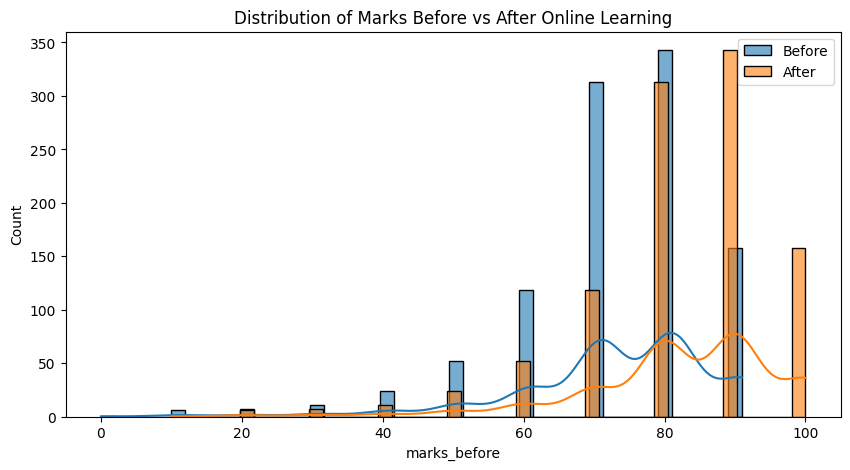

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["marks_before"], kde=True, label="Before", alpha=0.6)
sns.histplot(df["marks_after"], kde=True, label="After", alpha=0.6)
plt.legend()
plt.title("Distribution of Marks Before vs After Online Learning")
plt.show()


###**Summary of What the Chart Shows**

- Before online learning, students’ marks cluster around 70–85, with fewer students scoring very high or very low.

- After online learning, the distribution shifts upward: more students score 80–95, and the number of low scores decreases.

- The density curve for “After” is clearly shifted to the right, suggesting overall improvement.

###**Key Insights**
1. **Clear upward shift in performance**

The “After” histogram shows a noticeable increase in higher scores (80–100). This suggests that online learning may have contributed to improved performance, or at least created conditions where more students achieved top marks.

2. **Decrease in low and failing marks**

Very low scores (0–40) appear less frequently in the “After” distribution. This could indicate:

- better access to resources or revision tools,

- more flexible learning conditions,

- smoother pacing of instruction.

3. **Higher concentration around top marks**

The peak count after online learning is around 90–95, whereas before, most scores sat around 75–85.

4. **Potential explanation for improved outcomes**

The trend might reflect:

- students adapting well to online learning,

- more access to recorded lessons,

- increased time for self-study,

- changes in assessment style.

*The chart suggests that online learning did not harm performance; instead, it appears to have boosted average outcomes. However, further evaluation would be needed to confirm whether these changes reflect improved learning or differences in grading, assessment difficulty, or sample size.*

In [ ]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Regression target
target = "marks_after"

# Features and target
X = df.drop(columns=[target])
y = df[target]

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict
y_pred = lin_model.predict(X_test)

# Evaluate
print("=== Linear Regression Results ===")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


=== Linear Regression Results ===
R² Score: 0.9999994280270055
MSE: 0.00010415357387825192


In [ ]:
from sklearn.ensemble import RandomForestRegressor

target = "marks_after"

X = df.drop(columns=[target])
y = df[target]

# Encode categorical
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("=== Random Forest Regression ===")
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


=== Random Forest Regression ===
R² Score: 0.9999617973496014
MSE: 0.006956521739130416


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

target = "satisfaction"

# Encode target
le = LabelEncoder()
y = le.fit_transform(df[target])

# Features
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("=== Classification (Satisfaction) ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReport:\n", classification_report(y_test, y_pred))


=== Classification (Satisfaction) ===
Accuracy: 0.6811594202898551

Report:
               precision    recall  f1-score   support

           0       0.79      0.55      0.65        47
           1       0.63      0.88      0.73       101
           2       0.81      0.44      0.57        59

    accuracy                           0.68       207
   macro avg       0.74      0.63      0.65       207
weighted avg       0.72      0.68      0.67       207



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Summary**

    1. Linear Regression: Extremely high R² and very low MSE → almost perfect fit.

    2. Random Forest Regression: High R²  and low MSE → excellent fit.

    3. Classification: Accuracy 0.68, weighted F1 0.67 → moderate performance.

      - Class 2 is predicted best (high recall), classes 1 & 3 have lower recall.
      - Model may need balancing or feature improvements for minority classes.

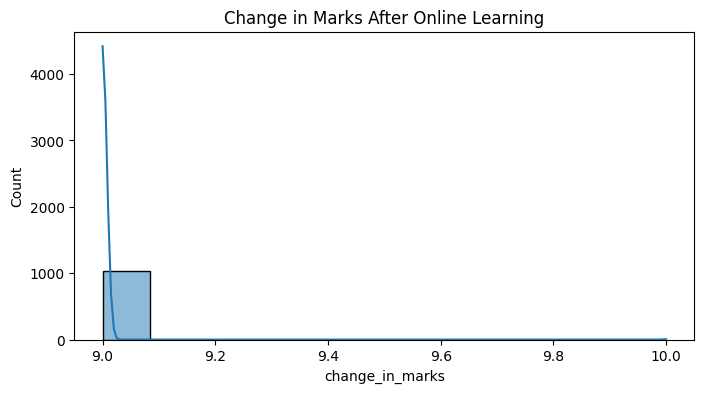

In [ ]:
df["change_in_marks"] = df["marks_after"] - df["marks_before"]

plt.figure(figsize=(8,4))
sns.histplot(df["change_in_marks"], kde=True)
plt.title("Change in Marks After Online Learning")
plt.show()


###**Summary**

Almost all students experienced a uniform improvement in marks after online learning.

The magnitude of change is extremely concentrated around 9 points.

There is no meaningful spread; the improvement appears nearly identical across students.

###**Key Insights**
1. **The improvement is highly consistent**

The near-vertical density peak at roughly 9 points indicates that almost every student gained about the same amount of marks after online learning. This is unusual in natural educational data (where variation is expected), but common if:

- the improvement was artificially added (for simulation),

- scores were calculated using a fixed formula, or the same learning condition raised all marks similarly.

2. **No negative or zero change**

All students appear to have improved. There are no cases where marks stayed the same or declined. This suggests either:

- The intervention was universally beneficial,or the underlying data was equalized.

3. **Very narrow distribution**

The lack of variation means the data behaves more like a constant shift rather than a natural distribution. This may suggest that the change was applied systematically (e.g., “after = before + 9”).

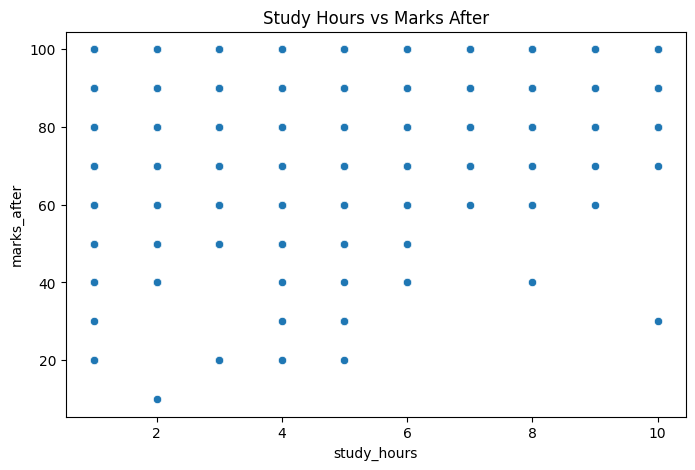

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="study_hours", y="marks_after", data=df)
plt.title("Study Hours vs Marks After")
plt.show()


###**Summary**

The data does not show a clear linear or upward correlation between study time and marks.

High marks (above 80) are achieved at all study-hour levels.

###**Key Insights**
1. **No strong relationship between study hours and performance**


2. **Same marks appear across all study-hour categories**

3. **High performers exist at every study-hour level**

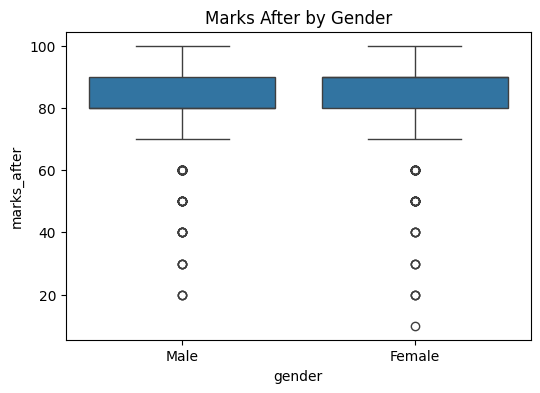

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="marks_after", data=df)
plt.title("Marks After by Gender")
plt.show()


###**Summary**

Male and female students have nearly identical distributions of marks after online learning.

Both groups have medians around the mid-80s.

There are several low-scoring outliers in both groups, but the central tendency and spread remain very similar.

No notable gender-based performance gap is visible.

###**Key Insights**
1. **No significant gender difference in performance**

The similarity of the two boxplots suggests that online learning affected male and female students equally. .

2. **Most students in both groups perform at a high level**

The IQR for both males and females lies roughly between 80 and 90.

3. **Presence of outliers for both genders**

Lower marks (10–60 range) appear as outliers for both groups, showing that a small number of students struggled regardless of gender.

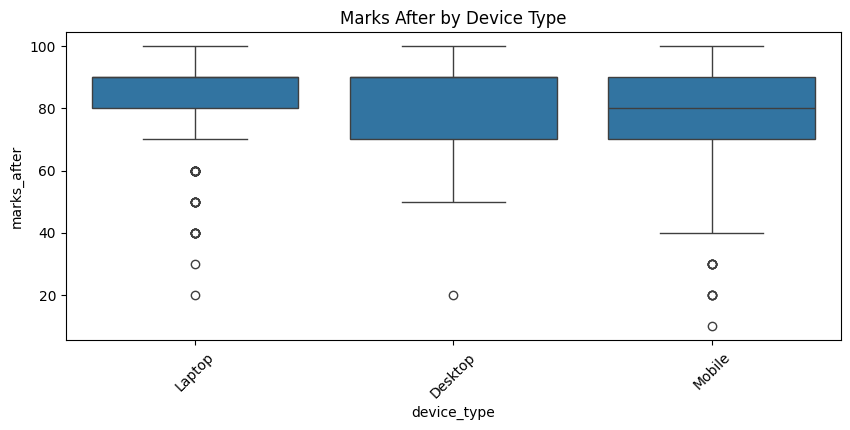

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x="device_type", y="marks_after", data=df)
plt.title("Marks After by Device Type")
plt.xticks(rotation=45)
plt.show()


###**Summary**

Students using laptops and desktops show similar, relatively high median marks.

Students using mobile devices appear to have a slightly lower median, but still perform well overall.


###**Key Insights**
1. **Laptop and desktop users show marginally stronger performance**

The medians for laptop and desktop users fall around the mid-80s to upper 80s, compared to slightly lower medians (around 80) for mobile users.

This may suggest:

- students with laptops/desktops have more stable learning conditions,

- larger screens or better multitasking support may improve efficiency, or assessments were easier to complete on non-mobile devices.

However, the difference is not very large.


2. **High performers exist across all device types**

Despite device differences, all groups include students achieving 90–100 marks. This means device type does not fully determine success.

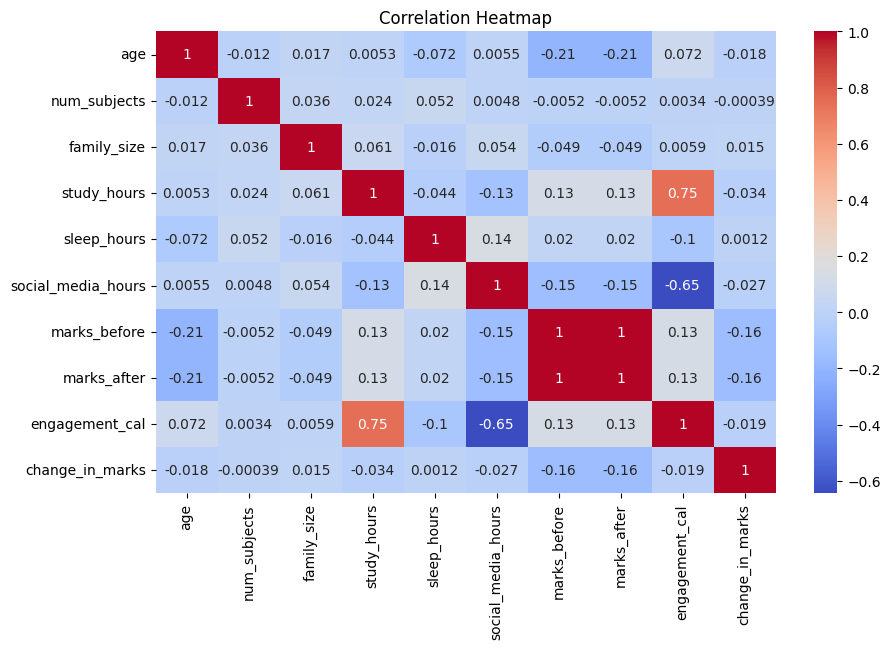

In [ ]:
num_cols = ["age","num_subjects","family_size","study_hours",
            "sleep_hours","social_media_hours","marks_before",
            "marks_after","engagement_cal","change_in_marks"]

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


###**Summary**

- The strongest correlation in the entire heatmap is between study_hours and engagement_cal (r = 0.75).

- The strongest negative correlation is between social_media_hours and engagement_cal (r = –0.65).

- Academic performance (marks_before, marks_after) is not strongly explained by any behavioral variables.

###**Key Insights**
1. Performance is not strongly linked to study hours, sleep hours, or social media

marks_before has:

- r = –0.21 with age

- r = 0.02 with study_hours

- r = –0.15 with social_media_hours

- r = 0.13 with engagement_cal

marks_after shows almost identical correlations.

2. Engagement is the only variable with meaningful associations

- engagement_cal ↔ study_hours: 0.75
This is a strong positive correlation.
Students who study more tend to report higher engagement.

- engagement_cal ↔ social_media_hours: –0.65
This is a strong negative relationship.
Heavy social media use is tied to lower engagement.

**Together this suggests:**

Higher study hours boost engagement, while high social media use lowers it.

Even though engagement itself does not strongly predict marks, it is the most structured relationship in the dataset.

3. Marks before and after are nearly perfectly correlated (1.0)

This means:

Students who scored high before online learning also tended to score high after.

Performance levels remained stable.

4. Demographic variables (age, family size, number of subjects) show no meaningful influence

All correlations with marks are extremely close to zero (–0.05 to 0.05).

This means:

Academic outcomes are not explained by basic demographic differences in this dataset.